<a href="https://colab.research.google.com/github/amscally-dsci/DDDS-My-Project/blob/main/Project-1/Transaction_Success_Rate_Prediction_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – To Do List



# Transaction Success Rate Prediction Using Naive Bayes
This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the project.

## Problem Definition

1. Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.



Problems:
(1) Is a customer satisfied?
(2) Will a customer buy this product?
(3) Can a customer pay this loan?

## Data Collection

2. Load Pandas, Numpy, and Matplotlib.

1. Load data Train.csv from AWS S3.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
#read csv file
transaction = pd.read_csv("https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv")

In [ ]:
# view the column names
transaction.head(10)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,train_5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,6,train_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,train_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,train_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,train_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transaction.shape

(1050000, 104)

In [ ]:
# how can/did you discover if there are any unique identifiers and how would/did you handle them?
transaction.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# how can/did you discover if there are any unique identifiers and how would/did you handle them?
transaction.drop("ID_code", axis=1, inplace=True)

In [ ]:
# view the column names
transaction

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transaction.isna().sum().sum()

97920000

In [ ]:
transaction.dropna(subset=['target'], how='any',axis=0,inplace=True)
transaction

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
11,0.0,4.4949,14.4142,13.2219,NaN,4.9140,NaN,NaN,4.0501,5.8144,...,NaN,13.9424,NaN,-15.5776,NaN,NaN,NaN,NaN,NaN,14.1222
15,0.0,4.9657,16.2867,17.9579,NaN,0.6017,NaN,NaN,-5.4904,6.6670,...,NaN,3.7943,NaN,5.6184,NaN,NaN,NaN,NaN,NaN,14.0619
19,0.0,9.4287,18.7822,10.7630,NaN,-0.7532,NaN,NaN,8.8477,6.8045,...,NaN,-5.6677,NaN,-1.8961,NaN,NaN,NaN,NaN,NaN,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,5.0267,7.1953,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,-2.5987,6.6798,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689


In [ ]:
# Before cleaning up NaN, make a copy of the Transaction data frame, then save it as transaction_clean
transaction_clean = transaction.copy()
transaction_clean

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
11,0.0,4.4949,14.4142,13.2219,NaN,4.9140,NaN,NaN,4.0501,5.8144,...,NaN,13.9424,NaN,-15.5776,NaN,NaN,NaN,NaN,NaN,14.1222
15,0.0,4.9657,16.2867,17.9579,NaN,0.6017,NaN,NaN,-5.4904,6.6670,...,NaN,3.7943,NaN,5.6184,NaN,NaN,NaN,NaN,NaN,14.0619
19,0.0,9.4287,18.7822,10.7630,NaN,-0.7532,NaN,NaN,8.8477,6.8045,...,NaN,-5.6677,NaN,-1.8961,NaN,NaN,NaN,NaN,NaN,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,5.0267,7.1953,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,-2.5987,6.6798,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689


## Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [ ]:
transaction_clean['target'].unique()

array([0., 1.])

In [ ]:
transaction_clean


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
11,0.0,4.4949,14.4142,13.2219,NaN,4.9140,NaN,NaN,4.0501,5.8144,...,NaN,13.9424,NaN,-15.5776,NaN,NaN,NaN,NaN,NaN,14.1222
15,0.0,4.9657,16.2867,17.9579,NaN,0.6017,NaN,NaN,-5.4904,6.6670,...,NaN,3.7943,NaN,5.6184,NaN,NaN,NaN,NaN,NaN,14.0619
19,0.0,9.4287,18.7822,10.7630,NaN,-0.7532,NaN,NaN,8.8477,6.8045,...,NaN,-5.6677,NaN,-1.8961,NaN,NaN,NaN,NaN,NaN,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,5.0267,7.1953,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,-2.5987,6.6798,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689


In [ ]:
transaction_clean.isna().sum().sum()

9180000

In [ ]:
transaction_clean.isna().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,180000
...,...
var_96,180000
var_97,180000
var_98,180000
var_99,180000


In [ ]:
column_filter=transaction_clean.isna().sum()>90000
column_filter

,0
target,False
var_0,False
var_1,False
var_2,False
var_3,True
...,...
var_96,True
var_97,True
var_98,True
var_99,True


In [ ]:

transaction_clean.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
5,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
11,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
15,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
19,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
1049993,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
1049995,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False
1049997,False,False,False,False,True,False,True,True,False,False,...,True,False,True,False,True,True,True,True,True,False


In [ ]:
# Filter statement
cols_to_drop = transaction_clean.columns[transaction_clean.isna().sum() == len(transaction_clean)]
transaction_clean.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
transaction_clean

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
# filter formula --correct indexing error
# transaction_clean[column_filter]
transaction_clean.isna()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

In [ ]:
transaction_clean.isna().sum().sum() # np.int64(97920000) nulls were found.

0

In [ ]:
transaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

In [ ]:
transaction_clean.isna().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_4,0
var_7,0
var_8,0
var_14,0
var_15,0
var_17,0


## Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

1. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.





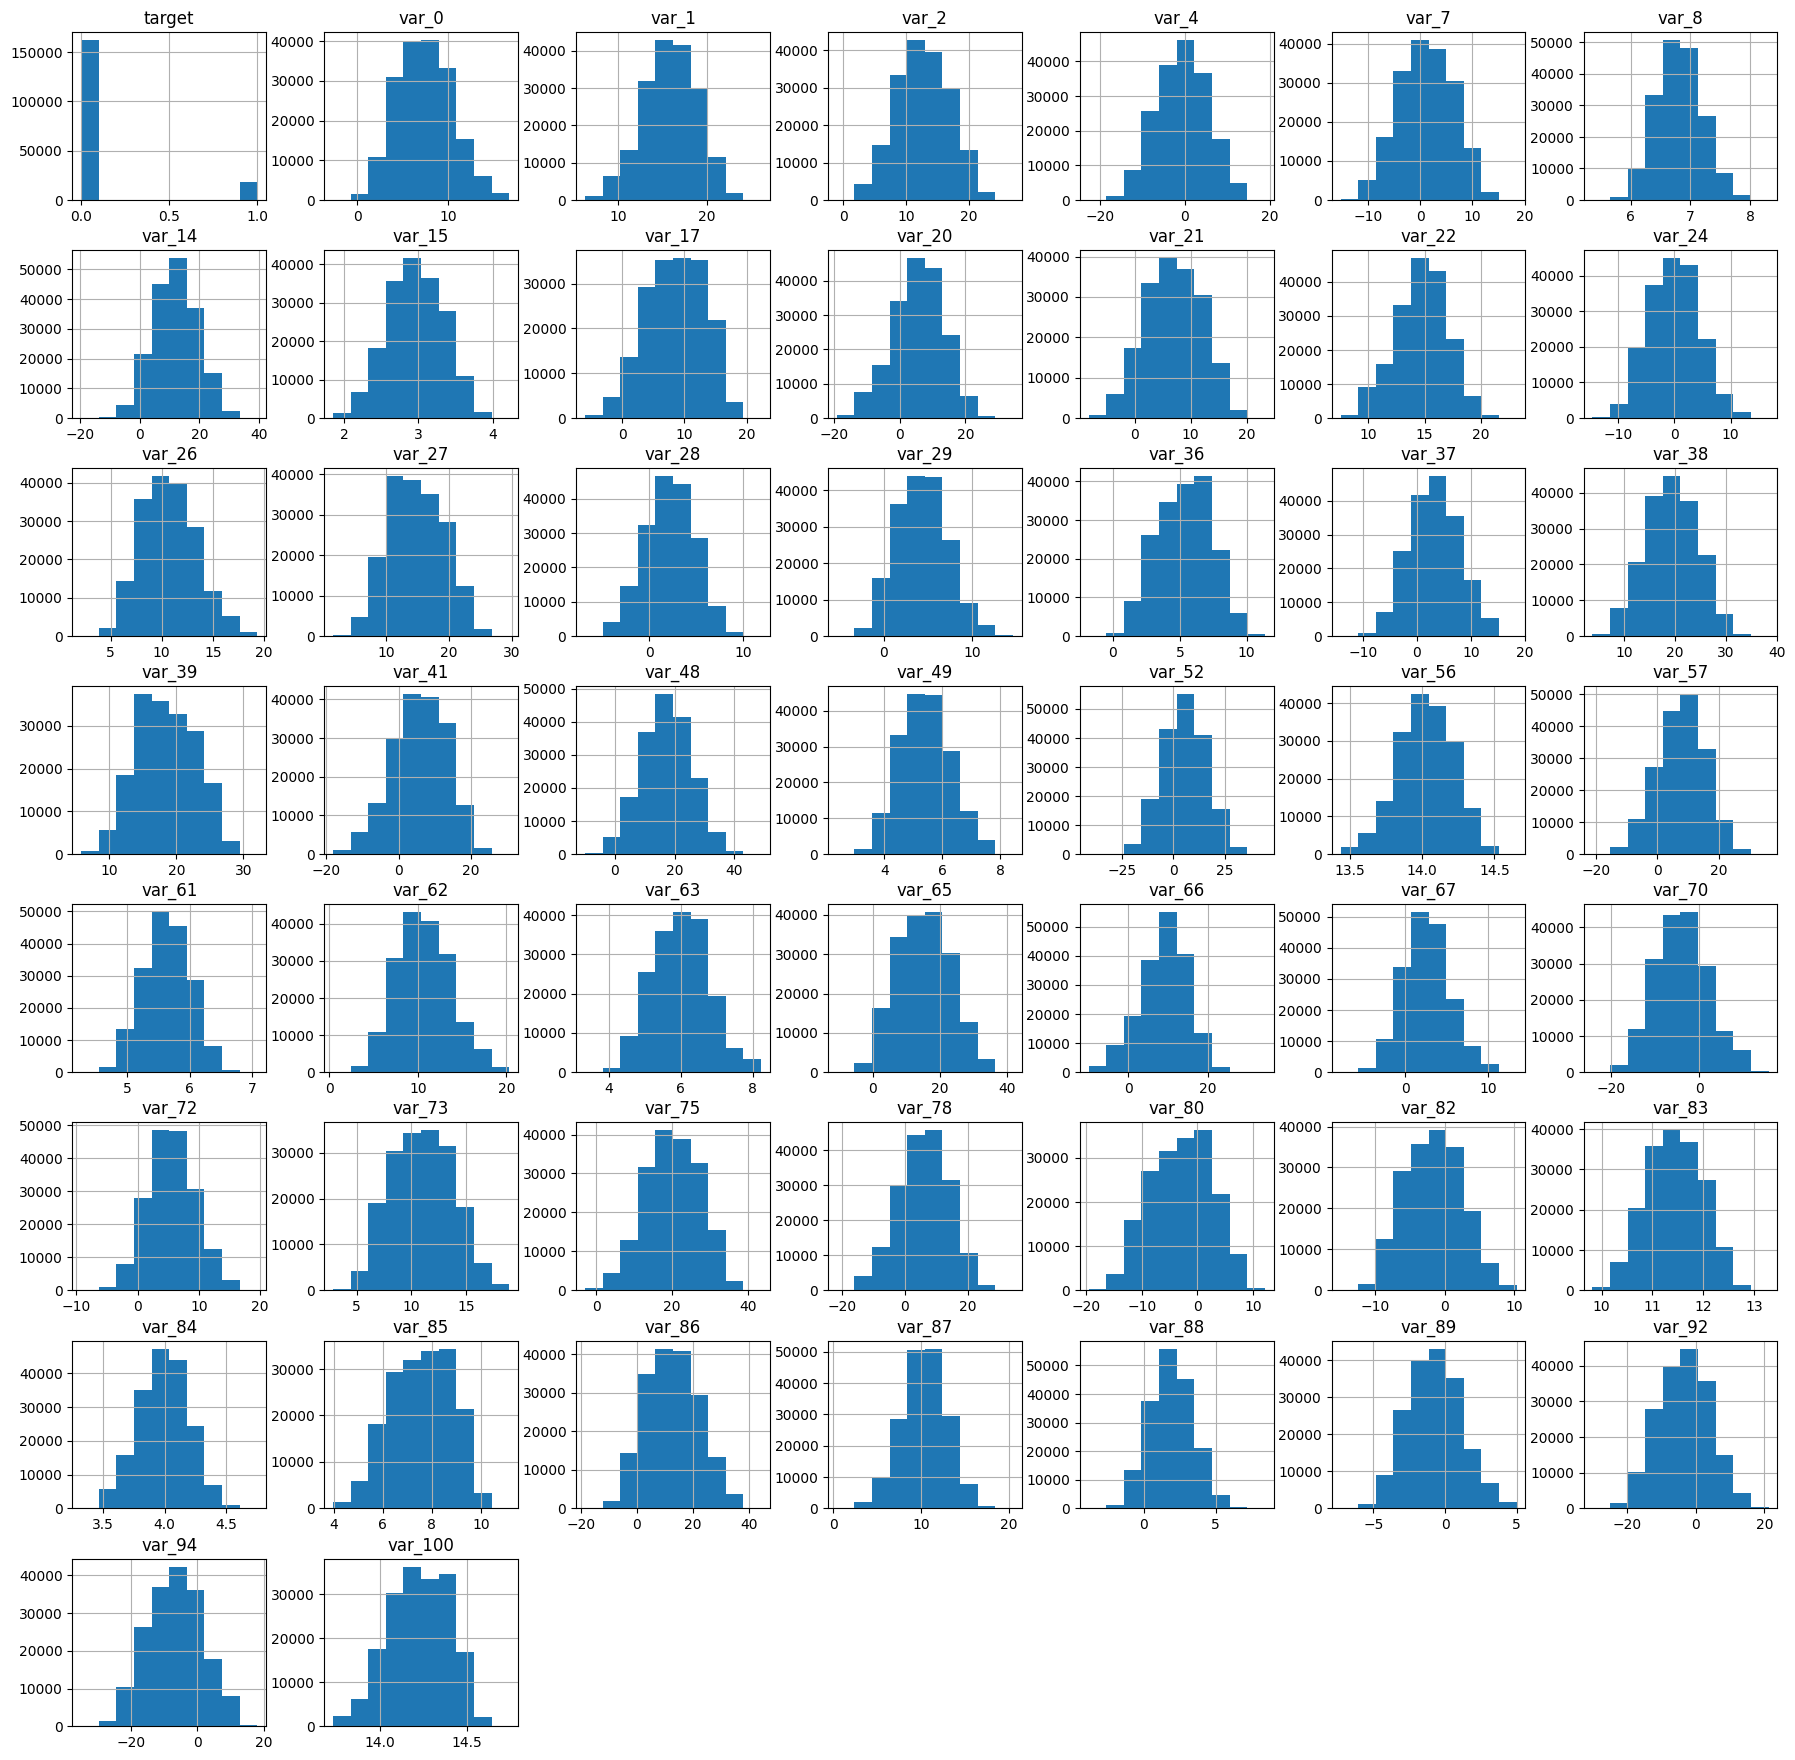

In [ ]:
# Histogram-the distribution of the data. Hists describe the frequency in which data appears in the data set. e.g., heights5'3",5'1",5'3",5'5"        normally distributed
transaction_clean.hist(figsize=(22,22))
plt.show()

Requirements for Gaussian Bayes model
1) Assumption 1 all features are normally distributed e.r., everything that is not our target--this one is 'var' columns.
2) normal distribution is a bell curve. Peak around the average, so our data is normally distributed.

Assumption 2 None of the features are highly correlated to each other. Features are independent variables of each other, i.e, only correlated to themselves.

Skew means higher or lower than mode or median (check).

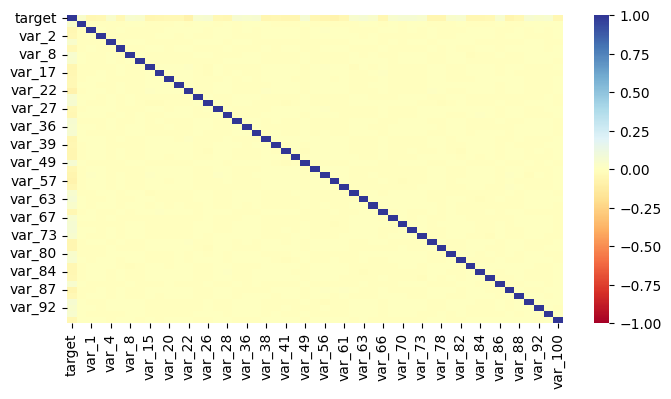

In [ ]:
corr = transaction_clean.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin=-1, vmax=1);

## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.Create GNB empty

1. Divide the two data frames you created in step #10 into training and testing subsets. Train test split to create 80/20 learn/test models.

1. Train the model using the training subset of the dataset. Fitting the model (step 2)

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy. Creating preditction (step 3/4)

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



In [ ]:
#x=features data frame
#y=Target data frame
y = transaction_clean['target'].copy()
X = transaction_clean.drop('target', axis=1, inplace=False)

In [ ]:
y

,target
3,0.0
5,0.0
11,0.0
15,0.0
19,0.0
...,...
1049990,0.0
1049993,0.0
1049995,1.0
1049997,0.0


In [ ]:
X

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
# Step 0 is to create an empty model
gnb = GaussianNB()

In [ ]:
# Step 1 train test split 20% of data that model is not using for learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Step 2 Fit the model 80% of data into model for it to learn what the patterns are
gnb.fit(X_train, y_train)
# Step 3 Prediction input features from test set and outputs predictions for target in my test set
# 20% of data that was not used for model learning.
y_pred = gnb.predict(X_test)
# Step 4 communicating error metrics-makes comparison between prediction y_pred and test set X_test and tells how accurate it is.
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"


Number of mislabeled points out of a total 36000 points : 3211


In [ ]:
# correctly labeled points count
36000-3211

32789

In [ ]:
32789/36000*100

91.08055555555555

## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()    # step 0 create empty model
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) # Step 1 test train split
    model_split_cv.fit(X_train, y_train) # Step 2 Fitting/train model
    y_split_pred = model_split_cv.predict(X_test) # Step 3 making predition
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred) # Step 4 communicating error metric i.e., accuracy, rmse, etc.

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5)*100)

91.13900000000001


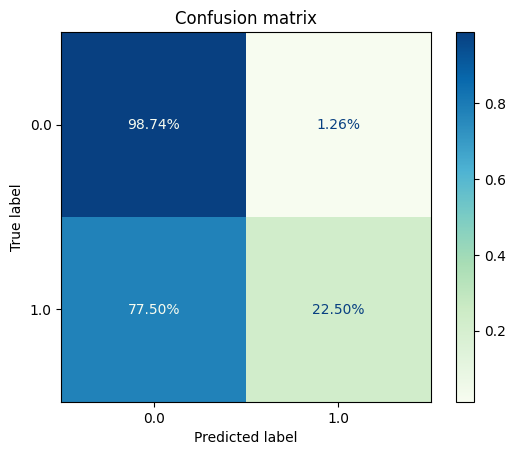

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

## Communicate the Results

22. Communicate the results of your analysis.



## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
